In [2]:
#Problem Statement
#The bank wants to build a model determining the customers having high rate of buying the loan. This will help in reducing the cost for campaign and also increase the success ratio.


In [28]:
#Importing all the packages required.


from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix, accuracy_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
#from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import warnings

import sklearn
import scipy

import sys
import os

In [29]:
#Importing data to bankloan_df
bankloan_df= pd.read_csv(r'C:\Users\sonka\Desktop\Analysis\Loan Prediction\Bank_Personal_Loan_Modelling.csv') #Read the dataset

In [11]:
bankloan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
bankloan_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
#Data Analysis and Steps involved init
#1. Shape of data which helps us in determing row and column count
#2. Determing the datatypes of the features in the dataset
#3. Initial analysis
#4. Looking for missing values if present
#5. Confirming if the dataset is balanced or not


In [13]:
# Shape of training and test data set
def dataframe_shape(df):
    print("The dataframe has %d rows" %df.shape[0])
    print("The dataframe has %d columns" %df.shape[1])

dataframe_shape(bankloan_df)

The dataframe has 5000 rows
The dataframe has 14 columns


In [14]:
# Feature in dataset
pd.DataFrame(bankloan_df.columns,index=None,copy=False).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [15]:
# First10 observation
bankloan_df.head(10) # Any number of row can be choosen by changing the number inside head function. But by default it shows 5

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [17]:
# Last 10 observation
bankloan_df.tail(10) # Any number of row can be choosen by changing the number inside tail function. But by default it shows 5

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [19]:
# Random 10 observation
bankloan_df.sample(10) # Any number of row can be choosen by changing the number inside sample function. But by default it shows 1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2527,2528,27,1,43,95120,3,1.10,2,0,0,0,0,0,0
4841,4842,59,35,40,92870,4,0.40,1,135,0,0,0,1,0
4443,4444,38,14,48,90034,1,1.80,1,169,0,0,0,0,0
2267,2268,38,13,168,92647,2,1.30,3,0,1,0,0,0,0
3403,3404,54,29,82,94709,3,3.70,2,0,1,0,0,1,0
1022,1023,27,3,118,95605,1,3.30,2,0,1,0,0,1,0
3174,3175,49,24,35,94701,4,0.20,2,0,0,0,0,0,1
3640,3641,64,34,53,95821,4,1.67,3,0,0,0,0,0,1
1822,1823,48,23,112,93014,1,5.10,2,86,1,1,1,1,0
2628,2629,33,6,78,95819,4,2.00,2,0,0,1,0,1,0


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64


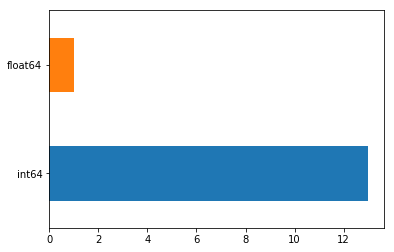

In [20]:
# data types present in training dataset
def datatypes_insight(data):
    display(data.dtypes.to_frame().T)
    data.dtypes.value_counts().plot(kind="barh")

datatypes_insight(bankloan_df)

In [21]:
# identifying missing values

def Nan_value(data):
    display(data.apply(lambda x: sum(x.isnull())).to_frame().T)
    ##data.apply(lambda x: sum(x.isnull())).plot(kind="barh")

Nan_value(bankloan_df)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


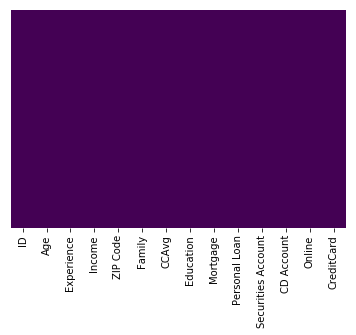

In [22]:
# Ploting the NAN values if there is any.
sns.heatmap(bankloan_df.isna(),yticklabels=False,cbar=False,cmap='viridis')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,5000,45,47,162,467,4,108,3,347,2,2,2,2,2


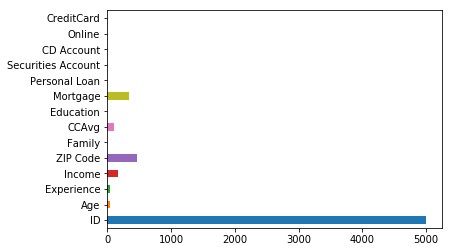

In [23]:
# Unique values available in features
def unique_data(data):
    display(data.apply(lambda x: len(x.unique())).to_frame().T)
    data.apply(lambda x: len(x.unique())).plot(kind="barh")

unique_data(bankloan_df)

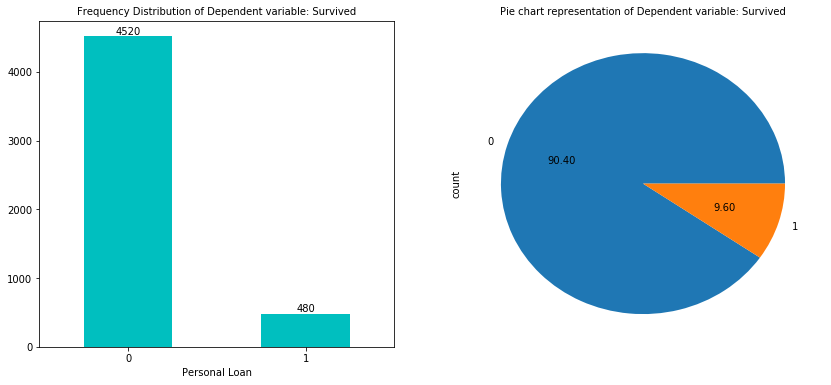

In [24]:
# checking imbalance dataset
fig, ax = plt.subplots(nrows=1, ncols=2,squeeze=True)
fig.set_size_inches(14,6)
frequency_colums= pd.crosstab(index=bankloan_df["Personal Loan"],columns="count")
frequency_colums.plot(kind='bar',ax=ax[0],color="c",legend=False,rot=True,fontsize=10)
frequency_colums.plot(kind='pie',ax=ax[1],subplots=True,legend=False,fontsize=10,autopct='%.2f')
ax[0].set_title('Frequency Distribution of Dependent variable: Survived',fontsize=10)
ax[1].set_title('Pie chart representation of Dependent variable: Survived',fontsize=10)

#adding the text labels
rects = ax[0].patches
labels = frequency_colums["count"].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height +1,label, ha='center', va='bottom',fontsize=10)
plt.show()

In [ ]:
#Observation from the initial Data Analysis Performed
#1. Dataset contains 5000 records having 14 feature.
#2. Dataset mostly consist of integers.
#3. Dataset contains no missing values

In [25]:
#statistical analysis of data set
bankloan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
#from above it can be induced that experience minimun is -3 which cannot be negative . Experience and age are related is assumed.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


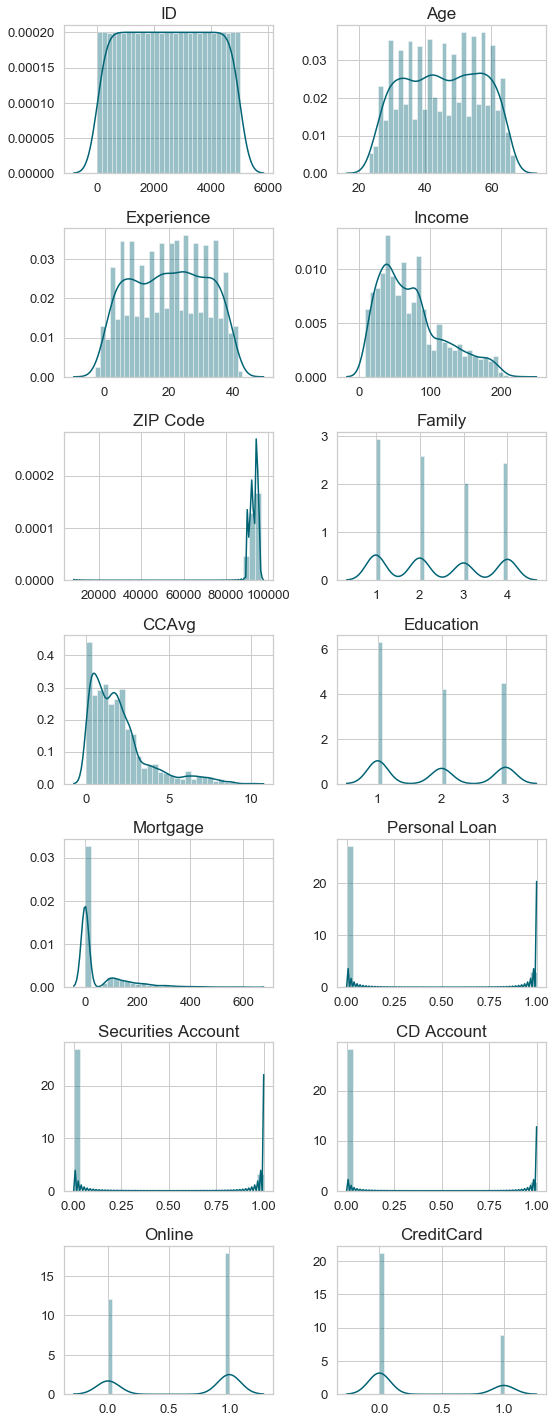

In [26]:
# Data Distribution of the features
def distploting(df):
    col_value=df.columns.values.tolist()
    sns.set(context='notebook',style='whitegrid', palette='dark',font='sans-serif',font_scale=1.2,color_codes=True)
    
    fig, axes = plt.subplots(nrows=7, ncols=2,constrained_layout=True)
    count=0
    for i in range (7):
        for j in range (2):
            s=col_value[count+j]
            #axes[i][j].hist(df[s].values,color='c')
            sns.distplot(df[s].values,ax=axes[i][j],bins=30,color="c")
            axes[i][j].set_title(s,fontsize=17)
            fig=plt.gcf()
            fig.set_size_inches(8,20)
            plt.tight_layout()
        count=count+j+1
        
             
distploting(bankloan_df)

In [ ]:
#Categorical feature:
ordinal:
Family
Education ###### nominal:
ID
Zip Code
Securities Account
CD Account
Online
Credit Card ### Numerical feature:
Age
Experience
Income
CCAvg
Mortage

In [ ]:
#Correlating
Trying to learn how well each feature correlate with personal loan acceptance


In [27]:
#Bi-Variate Analysis
bankloan_df[['CreditCard', 'Personal Loan']].groupby(['CreditCard'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,CreditCard,Personal Loan
1,1,0.097279
0,0,0.095467


In [28]:
bankloan_df[['Online', 'Personal Loan']].groupby(['Online'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Online,Personal Loan
1,1,0.09752
0,0,0.09375


In [29]:
bankloan_df[['Family', 'Personal Loan']].groupby(['Family'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Family,Personal Loan
2,3,0.131683
3,4,0.109656
1,2,0.081790
0,1,0.072690


In [30]:
bankloan_df[['Education', 'Personal Loan']].groupby(['Education'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Education,Personal Loan
2,3,0.136576
1,2,0.129722
0,1,0.044370


In [31]:
bankloan_df[['CD Account', 'Personal Loan']].groupby(['CD Account'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,CD Account,Personal Loan
1,1,0.463576
0,0,0.072371


In [32]:
bankloan_df[['Securities Account', 'Personal Loan']].groupby(['Securities Account'], as_index=False).mean().sort_values(by='Personal Loan', ascending=False)

,Securities Account,Personal Loan
1,1,0.114943
0,0,0.093792


In [ ]:
#Observation by analyzing features:
#CD_Account: We observe significant correlation (~0.5) among CD_Account=1 and Personal_Loan Accepted We decide to include this feature in our model.
#Securities Account/Education/Family: We observe mild correlation (>.1) with Personal_Loan Accepted.We decide to include these features in our model.
#Credit_Card/Online(NetBanking Facility): We observe less correlation (less than .1) with Personal_Loan Accepted.We may would like to exclude both these features from our model.

In [ ]:
#Visualizing Data

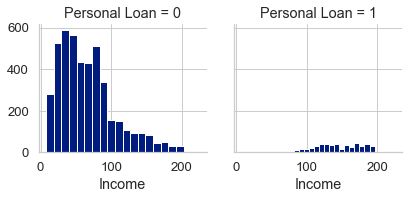

In [33]:
gau = sns.FacetGrid(bankloan_df, col='Personal Loan')
gau.map(plt.hist,'Income', bins=20)

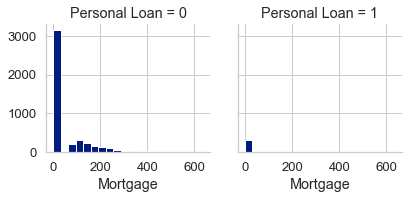

In [35]:
gau = sns.FacetGrid(bankloan_df, col='Personal Loan')
gau.map(plt.hist,'Mortgage', bins=20)

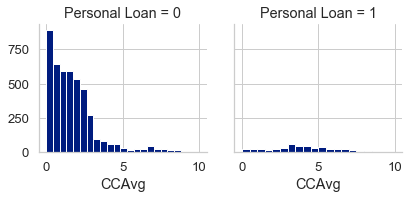

In [37]:
gau = sns.FacetGrid(bankloan_df, col='Personal Loan')
gau.map(plt.hist,'CCAvg', bins=20)

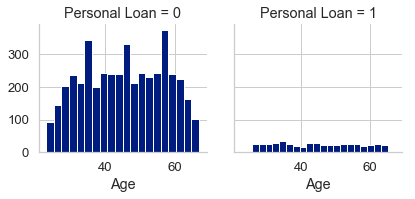

In [38]:
gau = sns.FacetGrid(bankloan_df, col='Personal Loan')
gau.map(plt.hist,'Age', bins=20)

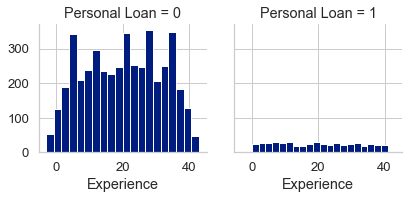

In [39]:
gau = sns.FacetGrid(bankloan_df, col='Personal Loan')
gau.map(plt.hist,'Experience', bins=20)

In [ ]:
#Observation
1. Customers having income less than 100K had high rejection rate
2. Customers having 0 Mortgagehad high rejection rate
3. Mostly customers follow in the range of 35-55
4. Customer having low CCAvg mostly rejected Personal loan offer whereas Customer having CCAvg between 2.5 to 6 has higher rate of acceptance of the offer
5. Most customers have experience range in 15-35



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


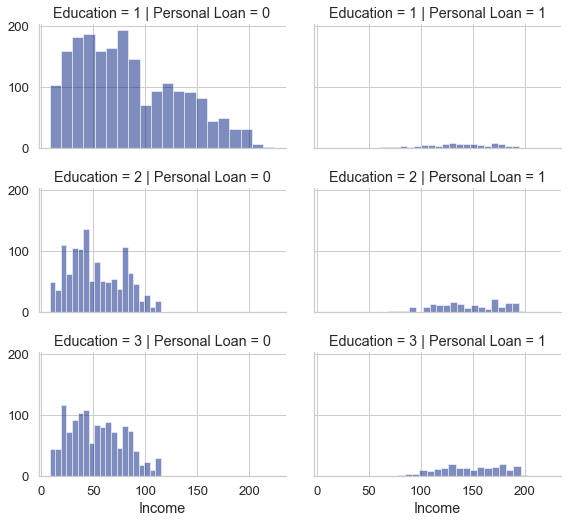

In [41]:
#Correlating numerical features and ordinal features
grid = sns.FacetGrid(bankloan_df, col='Personal Loan', row='Education', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
#Observation
Majority of teh customers had income less than 100K and undergraduate as education qualification,was the reason behind rejecting the loan


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


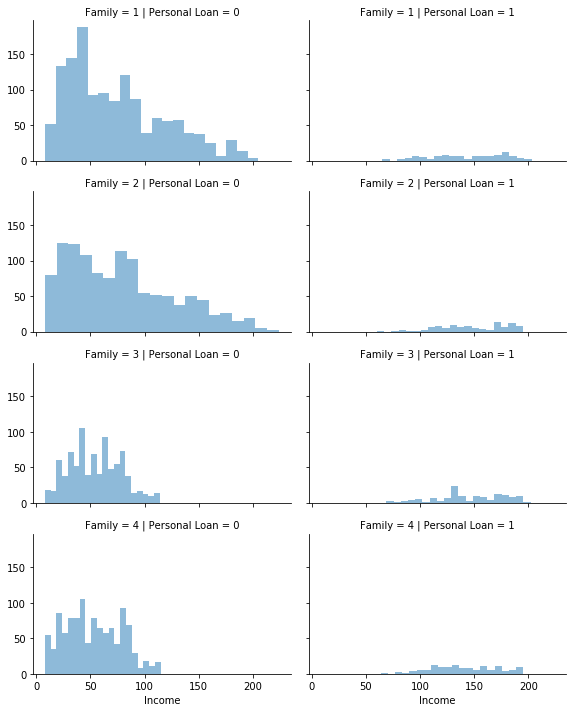

In [6]:
grid = sns.FacetGrid(bankloan_df, col='Personal Loan', row='Family', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
#Observation
The majority of the customers are mostly singles or couples

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


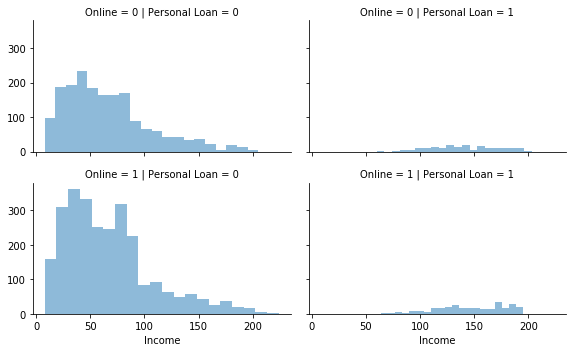

In [7]:
grid = sns.FacetGrid(bankloan_df, col='Personal Loan', row='Online', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
#Observation
Customers with salary greater than 120K do not have online facility

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


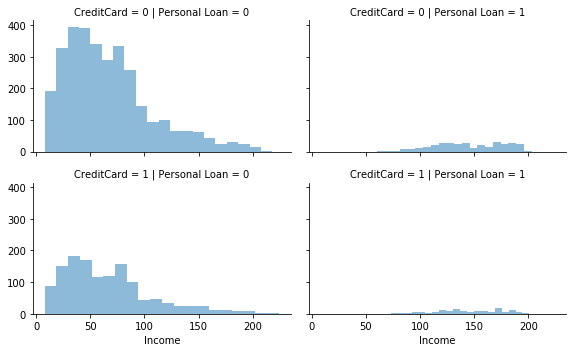

In [8]:
grid = sns.FacetGrid(bankloan_df, col='Personal Loan', row='CreditCard', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
#Observation
1. Most of the customers of the bank do not have credit card
2. Customers with no credit card have high chances of loan approval


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


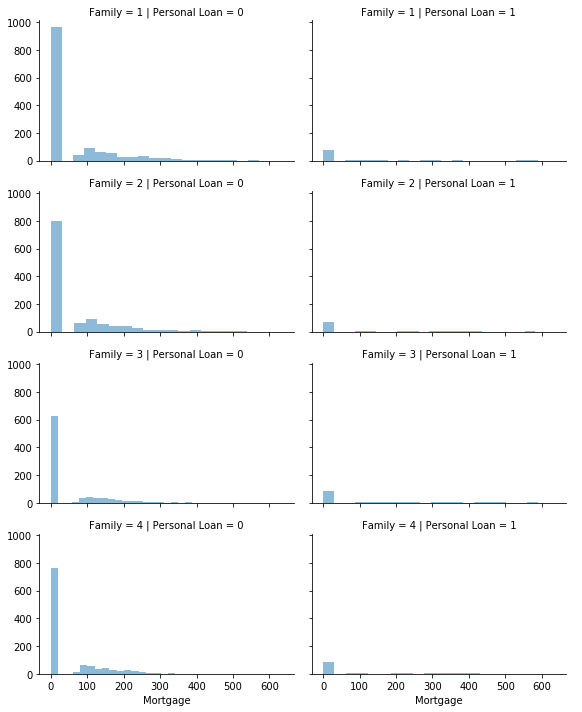

In [9]:
grid = sns.FacetGrid(bankloan_df, col='Personal Loan', row='Family', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Mortgage', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
#Data Cleaning
Earlier we found out that feature experience had negative value. Here we try to fix it out by comparing with the age

In [10]:
#Comapring Age , Education and Experience
pd.DataFrame(bankloan_df[bankloan_df["Experience"]>0][["Age","Education","Experience"]].sort_values("Age")).head()

,Age,Education,Experience
0,25,1,1
2836,25,1,1
2226,25,1,1
2192,25,1,1
3010,25,1,1


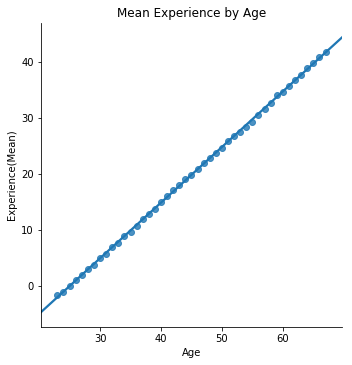

In [15]:
df = pd.DataFrame(bankloan_df.groupby("Age").mean()["Experience"]).reset_index()
sns.lmplot(x='Age',y='Experience',data=df)
plt.ylabel("Experience(Mean)")
plt.title("Mean Experience by Age")
plt.show()

In [17]:
#Observation
#From the plot it can be seen age and experience have linear relationship and data set is also correct but it has been captured with the wrong size.
bankloan_df["Experience"] = bankloan_df["Experience"].apply(abs)

In [19]:
#Creating new Feature 
bankloan_df["PP_income_M"] = (((bankloan_df["Income"]*1000)/12)-((bankloan_df["CCAvg"]*1000)/12))

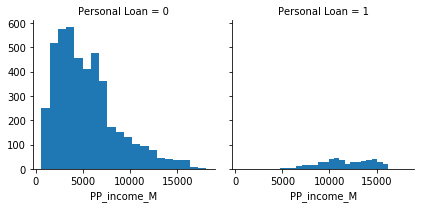

In [20]:
g = sns.FacetGrid(bankloan_df, col='Personal Loan')
g.map(plt.hist,'PP_income_M', bins=20)

In [21]:
#Droping Features
#Based on our assumptions we can drop ID and Zip
bankloan_df = bankloan_df.drop(['ID','ZIP Code'], axis=1)

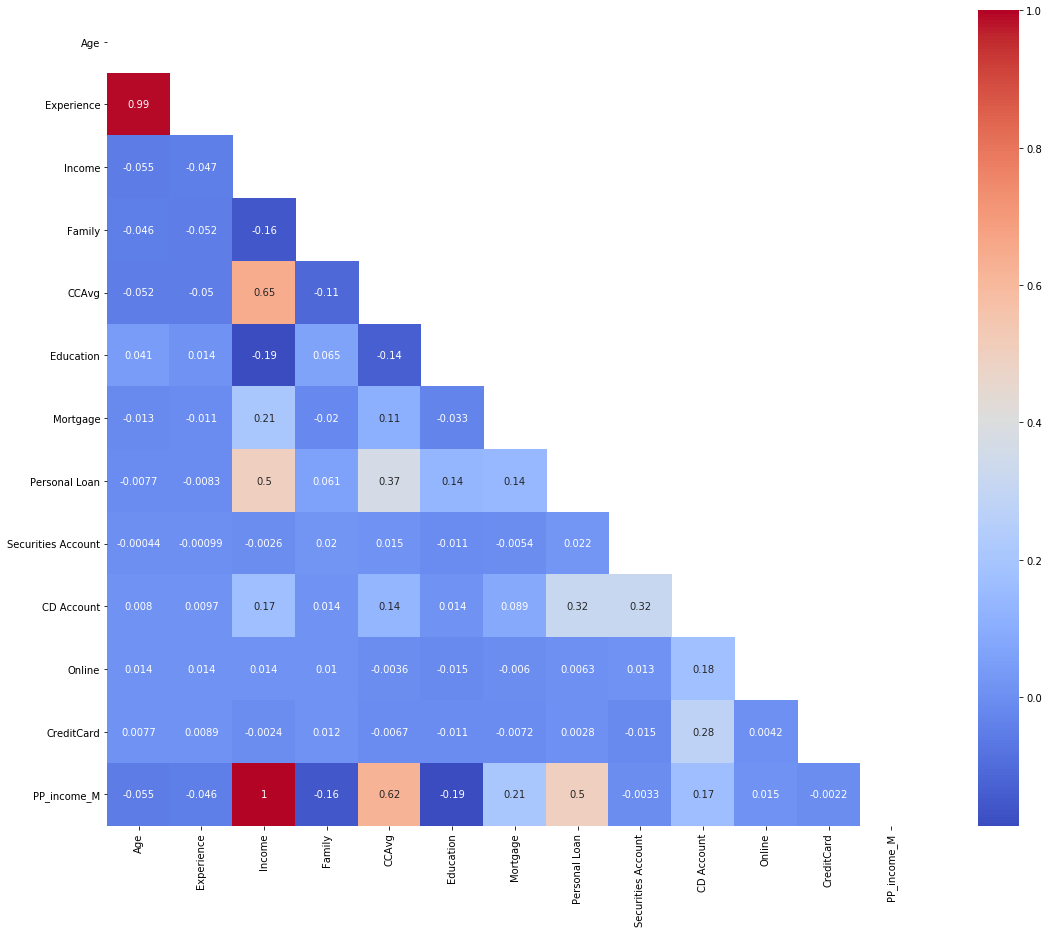

In [22]:
#Correlation Map
correlation = bankloan_df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,15))
sns.heatmap(correlation, mask=mask,annot=True,square=True,cmap="coolwarm")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1440x1440 with 0 Axes>

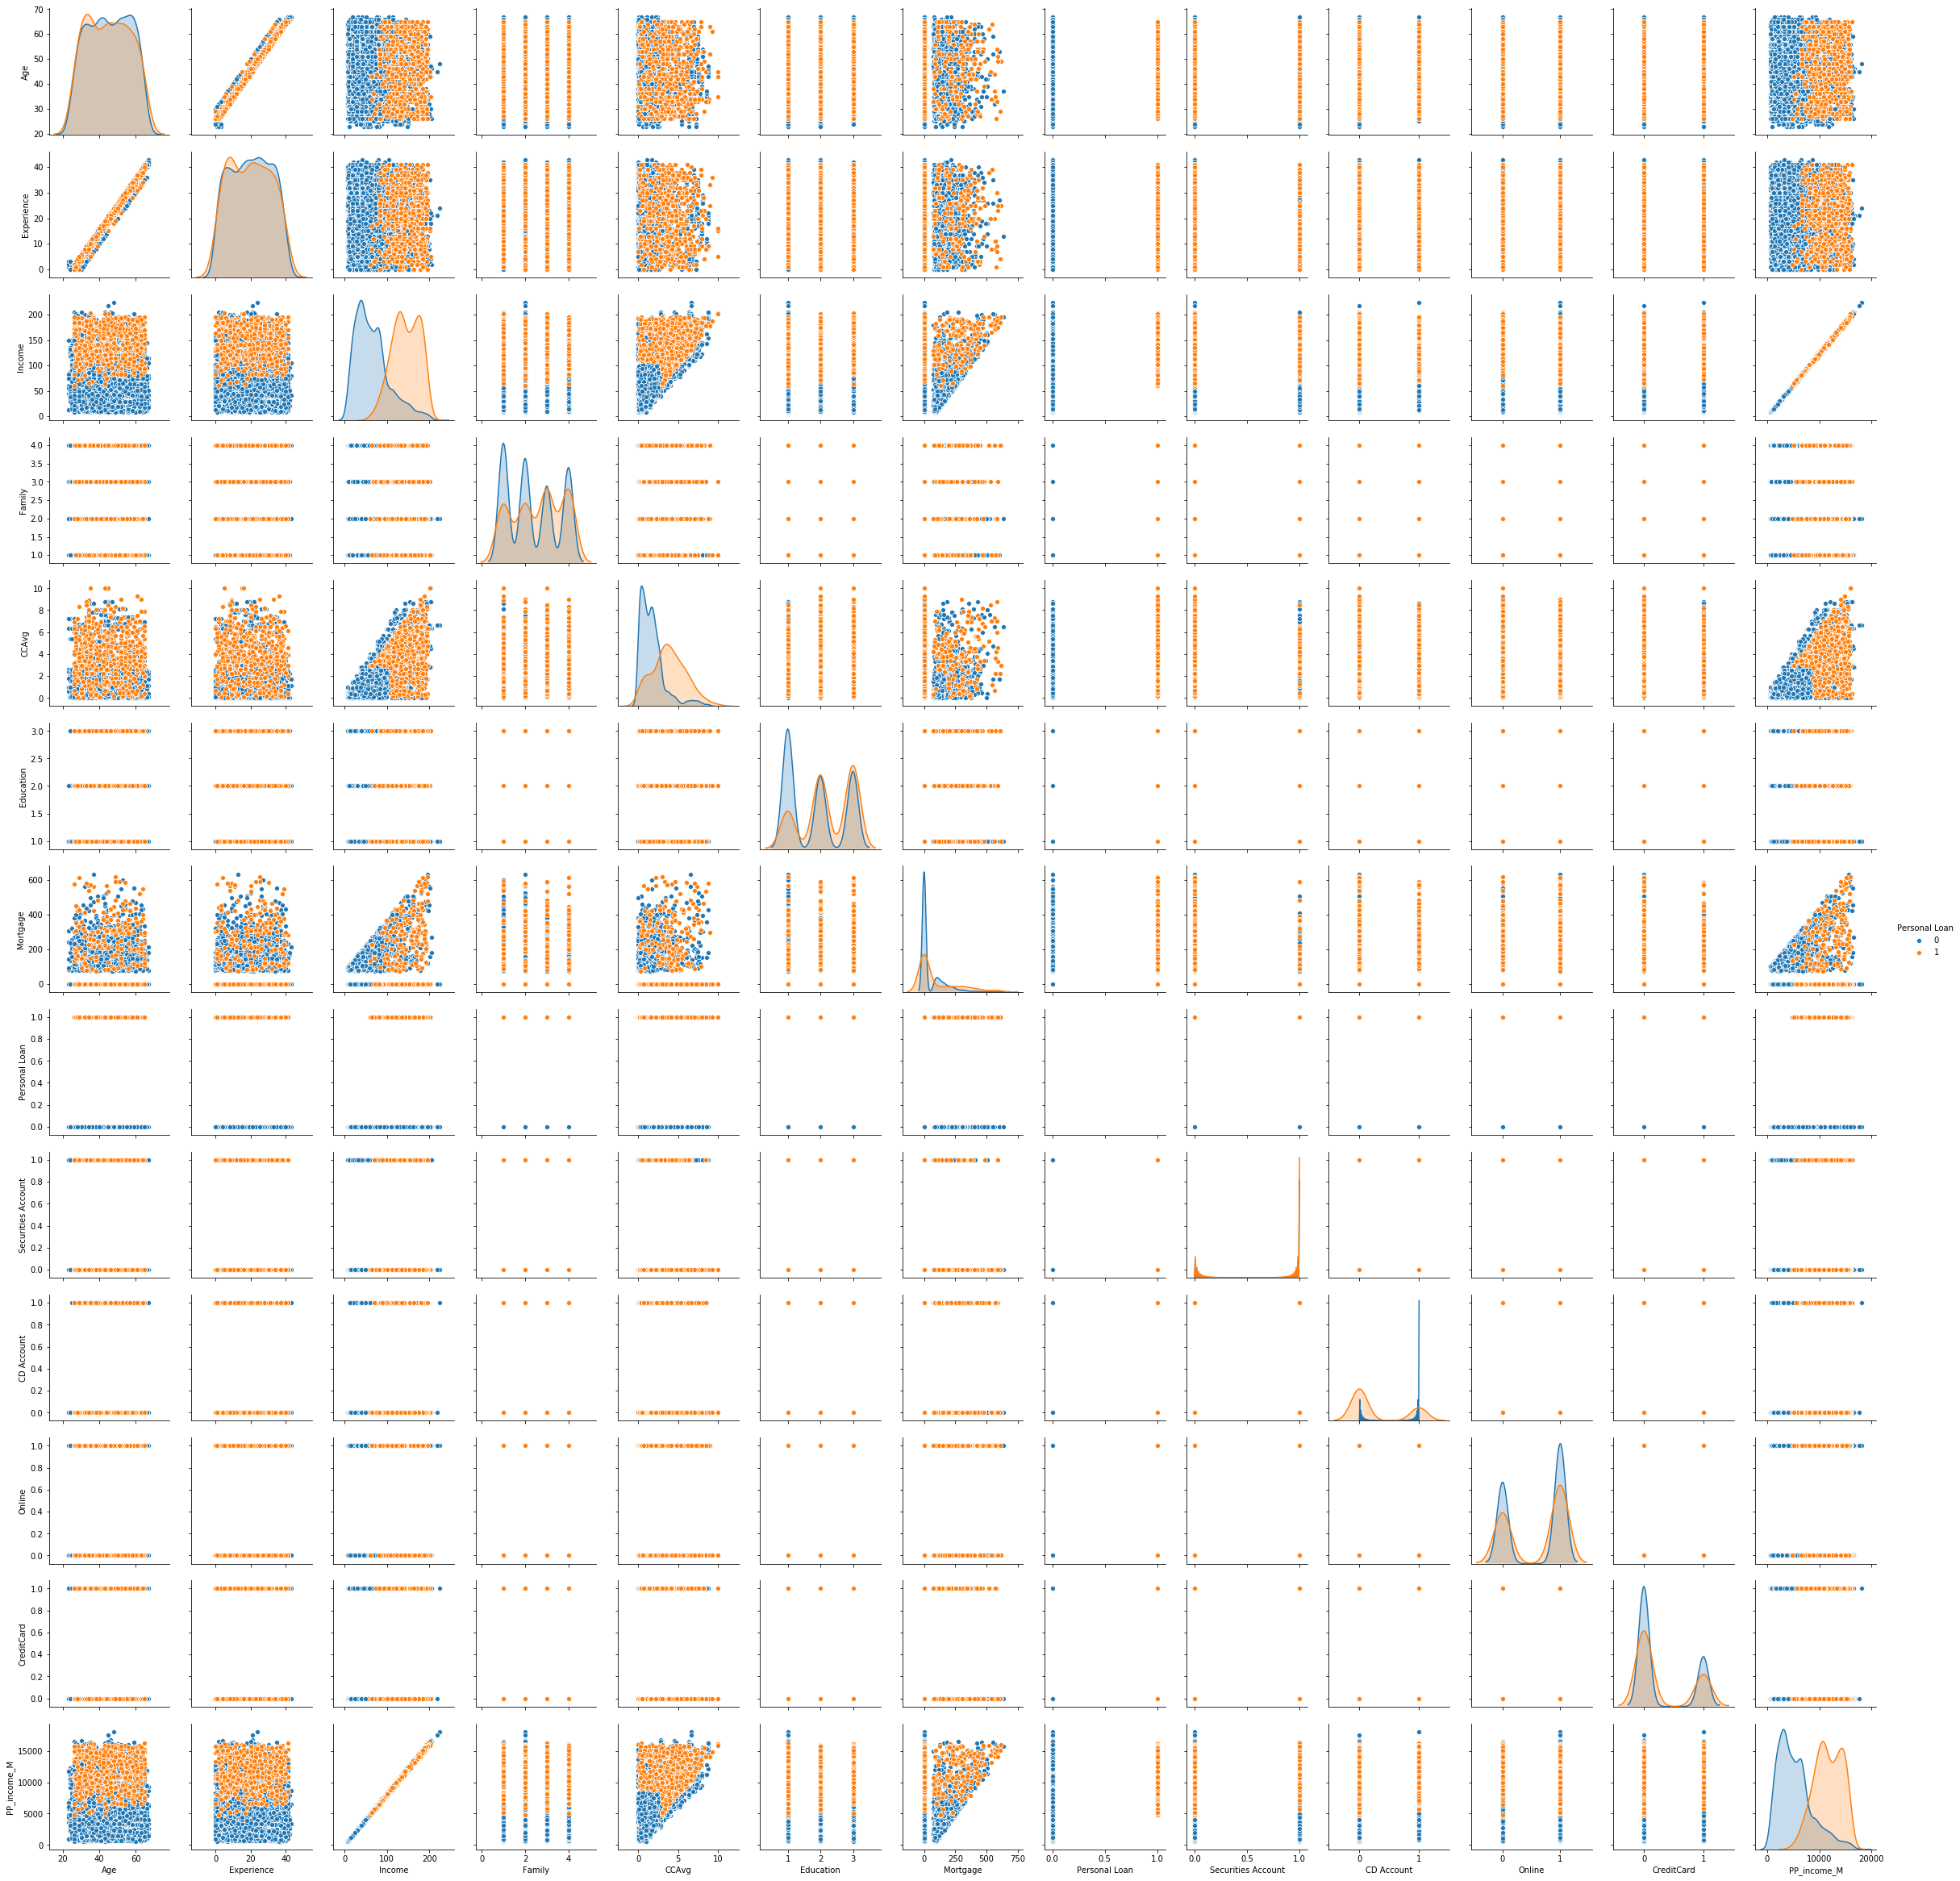

In [23]:
plt.figure(figsize=(20, 20))
sns.pairplot(bankloan_df,hue="Personal Loan")

In [25]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
scaler = StandardScaler();
col=['Age', 'Experience', 'Income', 'CCAvg','PP_income_M']
scaler.fit(bankloan_df[col])
scaled_bankloan_df = pd.DataFrame(scaler.transform(bankloan_df[col]),columns=col)
bankloan_df =bankloan_df.drop(col,axis=1)
bankloan_df = scaled_bankloan_df.join(bankloan_df)

In [26]:
#Spliting into Test-Train
X=bankloan_df[['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard','PP_income_M']]
y=bankloan_df["Personal Loan"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [ ]:
#Various Models

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
predict = logmodel.predict(X_test.values)
predictProb = logmodel.predict_proba(X_test.values)
acc_log=round(metrics.accuracy_score(predict,y_test)*100,2)

In [32]:
print("**"*40)
print('The accuracy of the Logistic is',metrics.accuracy_score(predict,y_test))
print("__"*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("__"*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print("__"*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print("**"*40)

********************************************************************************
The accuracy of the Logistic is 0.950666666667
________________________________________________________________________________
confusion_matrix :
 [[1343   11]
 [  63   83]]
________________________________________________________________________________

classification_report :
              precision    recall  f1-score   support

          0       0.96      0.99      0.97      1354
          1       0.88      0.57      0.69       146

avg / total       0.95      0.95      0.95      1500

________________________________________________________________________________
Recall Score 0.568493150685
ROC AUC : 0.958464013274
Accuracy : 0.950666666667
********************************************************************************


In [33]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
predict = knn.predict(X_test.values)
predictProb = knn.predict_proba(X_test.values)
acc_knn=round(metrics.accuracy_score(predict,y_test)*100,2)

In [35]:
print("**"*40)
print('The accuracy of the KNN is',metrics.accuracy_score(predict,y_test))
print("__"*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("__"*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print("__"*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print("**"*40)

********************************************************************************
The accuracy of the KNN is 0.968
________________________________________________________________________________
confusion_matrix :
 [[1349    5]
 [  43  103]]
________________________________________________________________________________

classification_report :
              precision    recall  f1-score   support

          0       0.97      1.00      0.98      1354
          1       0.95      0.71      0.81       146

avg / total       0.97      0.97      0.97      1500

________________________________________________________________________________
Recall Score 0.705479452055
ROC AUC : 0.924379312438
********************************************************************************


In [36]:
#Naive Bayes
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB(priors=None)

In [37]:
predict = gb.predict(X_test)
predictProb = gb.predict_proba(X_test)
acc_nb=round(metrics.accuracy_score(predict,y_test)*100,2)

In [38]:
print("**"*40)
print('The accuracy of the Naïve Bayes is',metrics.accuracy_score(predict,y_test))
print("__"*40)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("__"*40)
print("\nclassification_report :\n",classification_report(y_test, predict))
print("__"*40)
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print("**"*40)

********************************************************************************
The accuracy of the Naïve Bayes is 0.884666666667
________________________________________________________________________________
confusion_matrix :
 [[1229  125]
 [  48   98]]
________________________________________________________________________________

classification_report :
              precision    recall  f1-score   support

          0       0.96      0.91      0.93      1354
          1       0.44      0.67      0.53       146

avg / total       0.91      0.88      0.90      1500

________________________________________________________________________________
Recall Score 0.671232876712
ROC AUC : 0.934420590437
Accuracy : 0.884666666667
********************************************************************************


In [ ]:
#Evaluation of the model
We now want to evaluate and vhoose the best one for our problem. Although both Random Forest and Decison score the same accuracy but opted for random forest as it overcomes the problem of overfiiting the data

In [39]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Naive Bayes'],
    'Score': [acc_knn, acc_log, acc_nb, 
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,96.80
1,Logistic Regression,95.07
2,Naive Bayes,88.47
